In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [6]:
file_name = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv'

In [7]:
df=pd.read_csv(file_name)

In [8]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [9]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

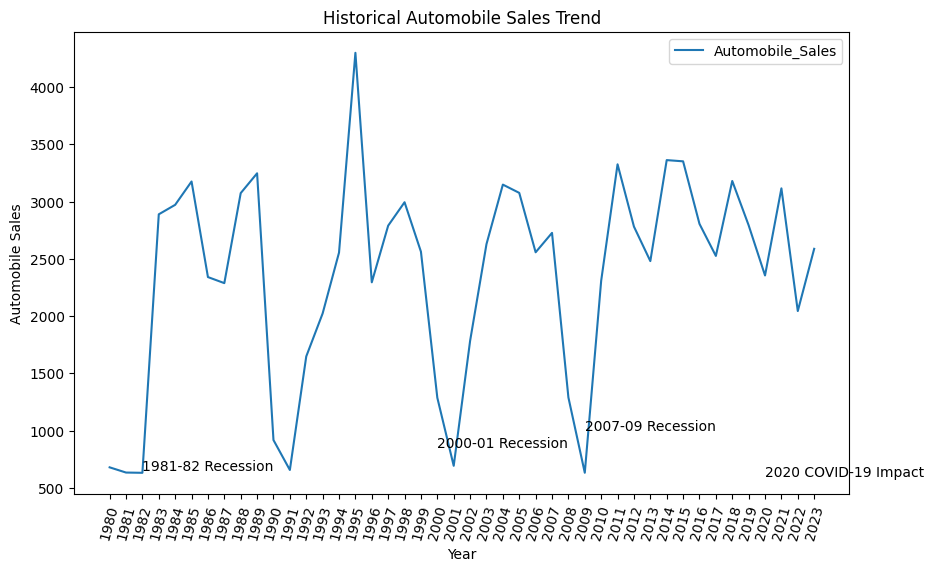

In [18]:
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Historical Automobile Sales Trend')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2000, 850, '2000-01 Recession')
plt.text(2009, 1000, '2007-09 Recession')
plt.text(2020, 600, '2020 COVID-19 Impact')
plt.legend()
plt.show()

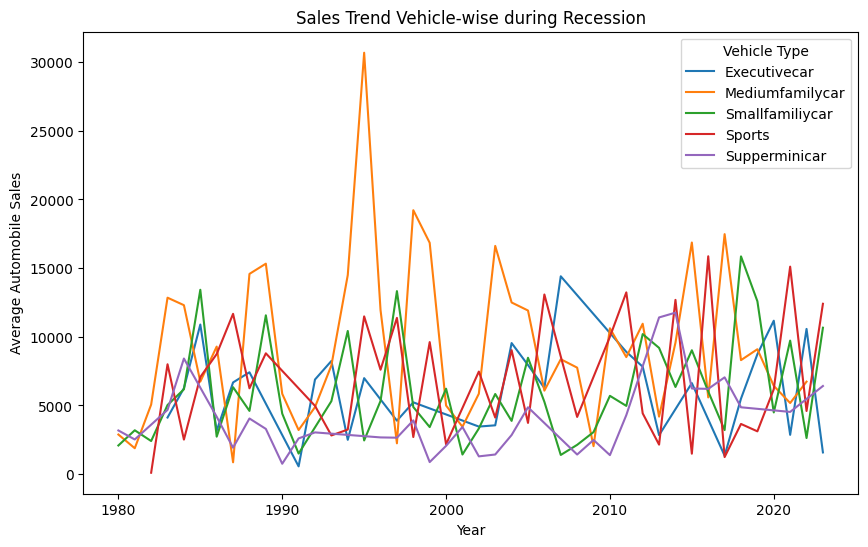

In [28]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
plt.figure(figsize=(10, 6))
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend(title='Vehicle Type')
plt.show()

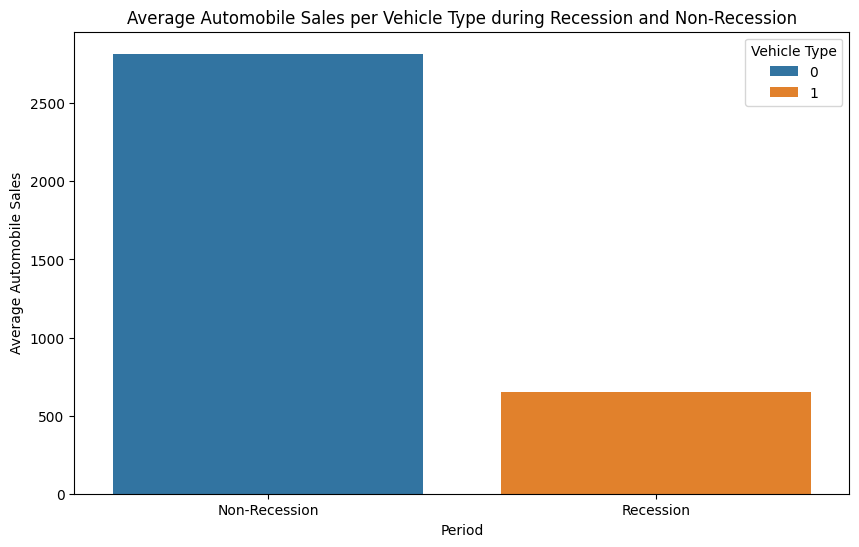

In [30]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Period')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales per Vehicle Type during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.legend(title='Vehicle Type', loc='upper right')
plt.show()

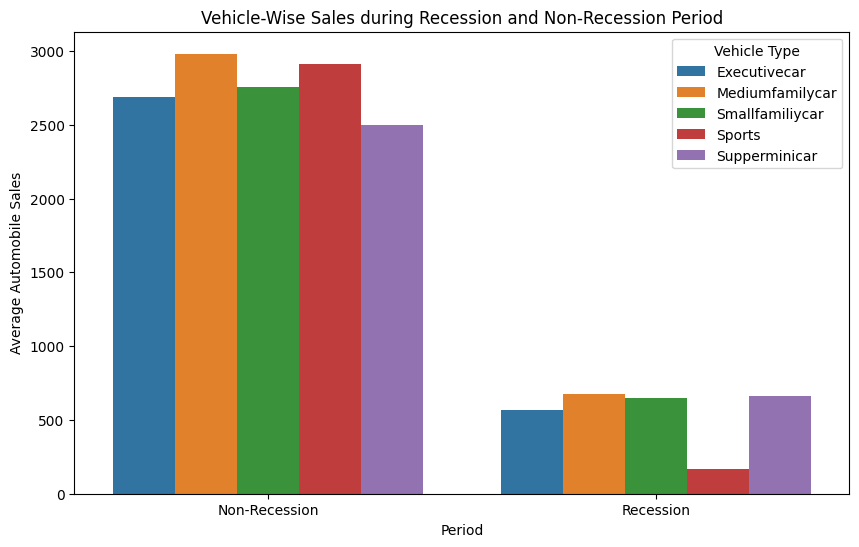

In [31]:
recession_data = df[df['Recession'] == 1]
dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.legend(title='Vehicle Type', loc='upper right')
plt.show()

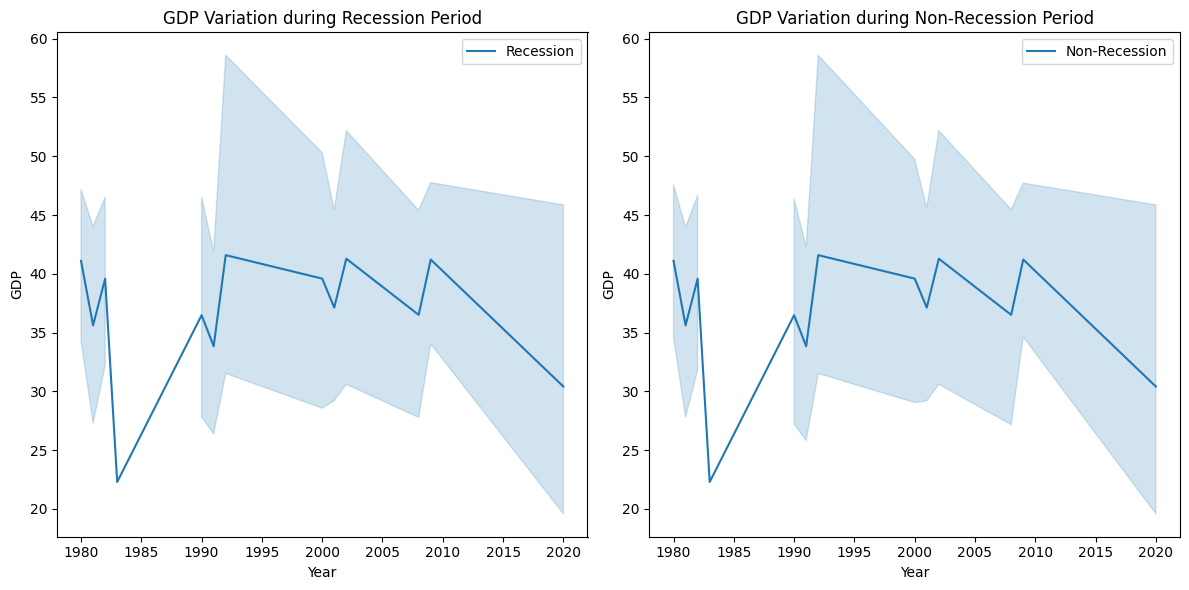

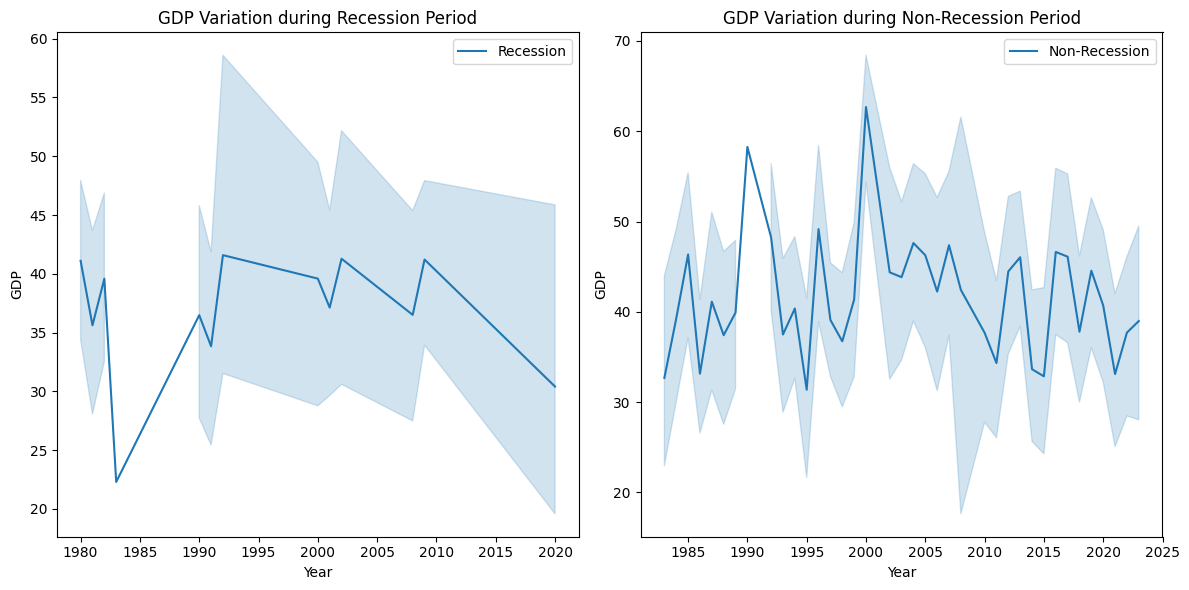

In [32]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
fig=plt.figure(figsize=(12, 6))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

sns.lineplot(x='Year', y='GDP', data=rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Recession Period')
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Non-Recession Period')
plt.legend()

plt.tight_layout()
plt.show()

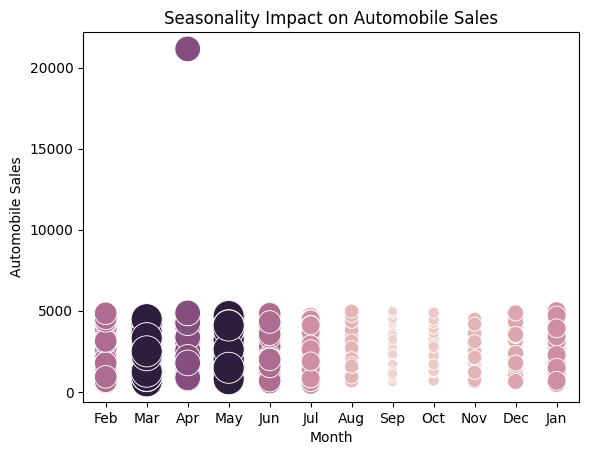

In [33]:
non_rec_data = df[df['Recession'] == 0]
size=non_rec_data['Seasonality_Weight']
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, sizes=(50, 500), hue='Seasonality_Weight', legend=False)
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

plt.show()

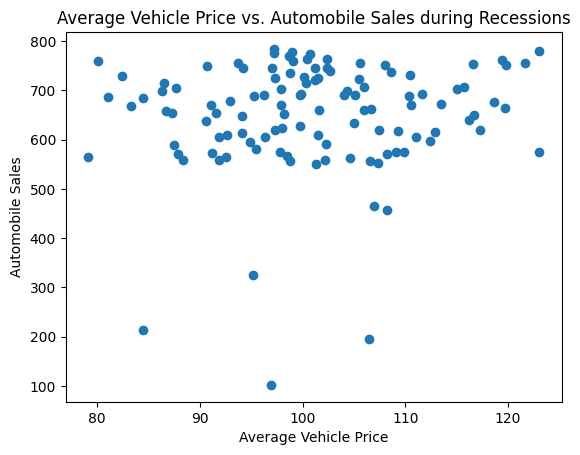

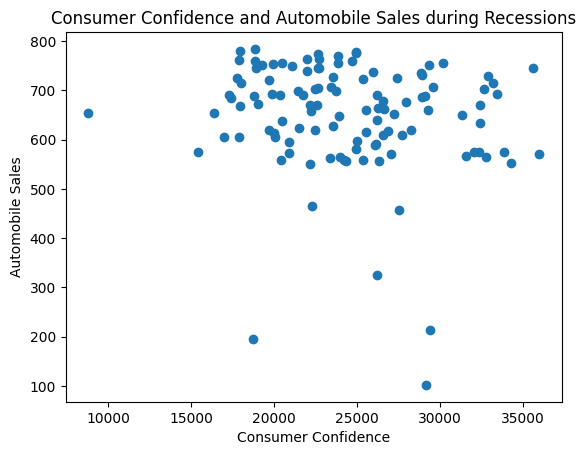

In [34]:
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Average Vehicle Price vs. Automobile Sales during Recessions')
plt.show()

rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

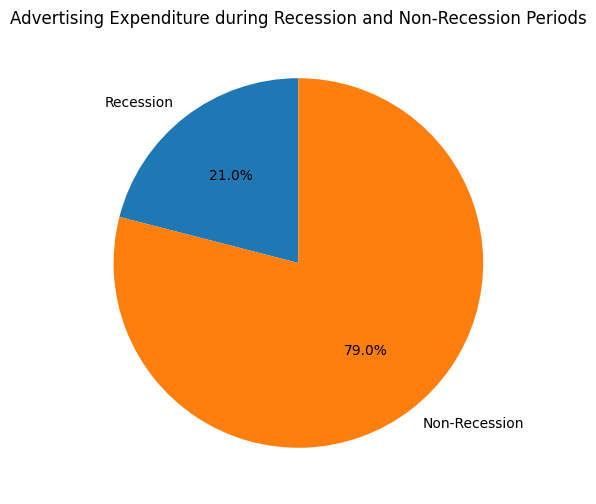

In [36]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

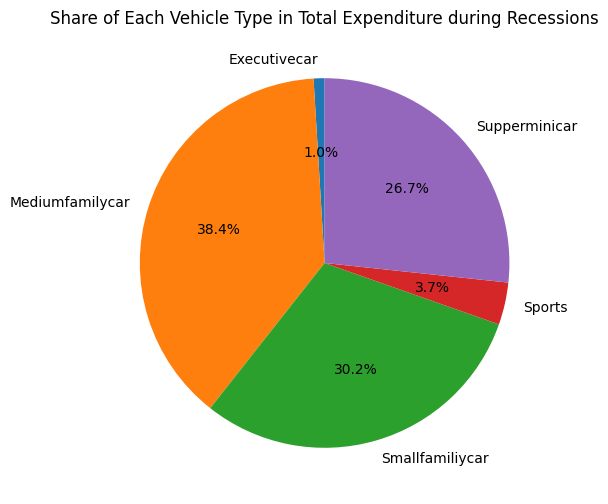

In [37]:
Rdata = df[df['Recession'] == 1]

VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')

plt.show()

In [41]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='Unemployment_Rate', y='Automobile_Sales', hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05, 0.3))

plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during Recession Period')

plt.show()

ValueError: Could not interpret value `Unemployment_Rate` for `x`. An entry with this name does not appear in `data`.

In [96]:
import dash
from dash import dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

In [97]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard")
])

if __name__ == '__main__':
    app.run_server(debug=True)

In [98]:
year_list = [i for i in range(1980, 2024, 1)]
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard"),
    dcc.Dropdown(
        id='dropdown-statistics',
        options=[
            {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
            {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
        ],
        placeholder='Select a report type',
        value='Select Statistics',
        style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'text-align-last': 'center'}
    ),
    dcc.Dropdown(
        id='select-year',
        options=[{'label': str(year), 'value': year} for year in year_list],
        placeholder='Select a year',
        style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'text-align-last': 'center'}
    )
])
if __name__ == '__main__':
    app.run_server(debug=True)

In [100]:
year_list = [i for i in range(1980, 2024, 1)]
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard"),
    dcc.Dropdown(
        id='dropdown-statistics',
        options=[
            {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
            {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
        ],
        placeholder='Select a report type',
        value='Select Statistics',
        style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'text-align-last': 'center'}
    ),
    dcc.Dropdown(
        id='select-year',
        options=[{'label': str(year), 'value': year} for year in year_list],
        placeholder='Select a year',
        style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'text-align-last': 'center'}
    ),html.Div(id='output-container', className='chart-grid', style={'display': 'flex'})
])
if __name__ == '__main__':
    app.run_server(debug=True)

In [106]:
year_list = [i for i in range(1980, 2024, 1)]
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard"),
    dcc.Dropdown(
        id='dropdown-statistics',
        options=[
            {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
            {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
        ],
        placeholder='Select a report type',
        value='Select Statistics',
        style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'text-align-last': 'center'}
    ),
    dcc.Dropdown(
        id='select-year',
        options=[{'label': str(year), 'value': year} for year in year_list],
        placeholder='Select a year',
        style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'text-align-last': 'center'}
    ),
    html.Div(id='output-container', className='chart-grid', style={'display': 'flex'})
])
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics', component_property='value')
)
def update_input_container(selected_statistic):
    if selected_statistic == 'Yearly Statistics':
        return False
    else:
        return True

@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='select-year', component_property='value'),
     Input(component_id='dropdown-statistics', component_property='value')]
)
def update_output_container(selected_year, selected_statistic):
    if selected_statistic == 'Recession Period Statistics':
        recession_data = data[data['Recession'] == 1]
        return html.Div([
            dcc.Graph(id='graph1', figure=figure1),
            dcc.Graph(id='graph2', figure=figure2),
            dcc.Graph(id='graph3', figure=figure3),
            dcc.Graph(id='graph4', figure=figure4)
        ])
    elif selected_statistic == 'Yearly Statistics':
        yearly_data = data[data['Year'] == selected_year]
    return html.Div([
            dcc.Graph(id='graph1', figure=figure1),
            dcc.Graph(id='graph2', figure=figure2),
            dcc.Graph(id='graph3', figure=figure3),
            dcc.Graph(id='graph4', figure=figure4)
        ])
    else:
        return html.Div("No data to display")

if __name__ == '__main__':
    app.run_server(debug=True)

SyntaxError: invalid syntax (3246455889.py, line 55)

In [108]:
# Assume you have the necessary recession data

# Function to prepare and display graphs for Recession Report Statistics
def prepare_recession_report_statistics(recession_data):
    # Plot 1: Automobile sales fluctuate over Recession Period (year wise) using line chart
    yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
    R_chart1 = dcc.Graph(
        figure=px.line(yearly_rec, x='Year', y='Automobile_Sales', title="Automobile Sales Fluctuation Over Recession Period")
    )
    
    # Plot 2: Calculate the average number of vehicles sold by vehicle type and represent as a Bar chart
    vehicle_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
    R_chart2 = dcc.Graph(
        figure=px.bar(vehicle_sales, x='Vehicle_Type', y='Automobile_Sales', title="Average Vehicle Sales by Vehicle Type during Recession")
    )
    
    # Plot 3: Pie chart for total expenditure share by vehicle type during recessions
    exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
    R_chart3 = dcc.Graph(
        figure=px.pie(exp_rec, values='Advertising_Expenditure', names='Vehicle_Type', title="Total Expenditure Share by Vehicle Type during Recession")
    )
    
    # Plot 4: Develop a Bar chart for the effect of unemployment rate on vehicle type and sales
    unemployment_chart = dcc.Graph(
        figure=px.bar(recession_data, x='Vehicle_Type', y='Unemployment_Rate', title="Effect of Unemployment Rate on Vehicle Type and Sales during Recession")
    )
    
    return [
        html.Div(className='chart-item', children=[html.Div(children=R_chart1), html.Div(children=R_chart2)]),
        html.Div(className='chart-item', children=[html.Div(children=R_chart3), html.Div(children=unemployment_chart)])
    ]

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Recession Report Statistics"),
    
    # Output container for displaying graphs
    html.Div(id='output-container', className='chart-grid', style={'display': 'flex'})
])

# Callback to update output container with graphs for recession report statistics
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value')]
)
def update_recession_report_statistics(selected_statistic):
    if selected_statistic == 'Recession Period Statistics':
        # Assume 'recession_data' is available
        return prepare_recession_report_statistics(recession_data)
    else:
        return []

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

In [111]:
elif (input_year and selected_statistics == 'Yearly Statistics'):
    yearly_data = data[data['Year'] == input_year]
    yas = data.groupby('Year')['Automobile_Sales'].mean().reset_index()
    Y_chart1 = dcc.Graph(figure=px.line(yas, x='Year', y='Automobile_Sales', title='Yearly Automobile Sales'))
    monthly_sales = data.groupby(['Year', 'Month'])['Automobile_Sales'].sum().reset_index()
    Y_chart2 = dcc.Graph(figure=px.line(monthly_sales, x='Month', y='Automobile_Sales', title='Total Monthly Automobile Sales'))

    avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
    Y_chart3 = dcc.Graph(figure=px.bar(avr_vdata, x='Vehicle_Type', y='Automobile_Sales', title='Average Vehicles Sold by Vehicle Type in the year {}'.format(input_year)))

    exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
    Y_chart4 = dcc.Graph(figure=px.pie(exp_data, values='Advertising_Expenditure', names='Vehicle_Type', title='Total Advertisement Expenditure for each vehicle'))

    return [
        html.Div(className='chart-item', children=[html.Div(children=Y_chart1), html.Div(children=Y_chart2)], style={'display': 'flex'}),
        html.Div(className='chart-item', children=[html.Div(children=Y_chart3), html.Div(children=Y_chart4)], style={'display': 'flex'})
    ]

SyntaxError: invalid syntax (3780538469.py, line 1)

__AUTHOR__

Rishabh Srivastava